In [130]:
import datasets
import numpy

lithium_threshold = 80
seed = 655

geochemical_analysis = datasets.geochemical_analysis()

In [173]:
lithium_column = "LI"

X_geo = []#["LATITUDE", "LONGITUDE", "ALTITUDE"]
X_mass = ["SIO2", "TIO2", "AL2O3","FE2O3T","FEOT","MNO","MGO","CAO","NA2O","K2O","P2O5","H2O", "CR2O3"]
X_impurities = ["SC", "V","CR","CO","NI","CU","ZN","GA","MO","W","SN","SB","RB","SR","Y","NB","ZR","CS","CD","BA","LA","CE","PR","ND","SM","EU","GD","TB","DY","HO","ER","TM","YB","LU","HF","TA","PB","TH","U","AU","AG","S","AS_","SE","TE","GE","BI","TL","BE","B","F","CL","INDIUM"]
X_ratios = ["Rb_K2O", "Rb_Yb", "Rb_La", "K2O_MgO", "Rb_MgO", "U_Ba", "Ba_La", "U_Th", "Rb_Sn", "K2O_Sn", "Rb_MnO", "MnO_MgO"]

x_labels = X_geo + X_mass + X_impurities + X_ratios
y_labels = [lithium_column]

mask_1 = (geochemical_analysis["LONGITUDE"] < -77.3) * (geochemical_analysis["LATITUDE"] > -8.81) * (geochemical_analysis["LI"].isna() == False)
mask_2 = (geochemical_analysis["LONGITUDE"] > -72.6) * (geochemical_analysis["LATITUDE"] < -13.76) * (geochemical_analysis["LI"].isna() == False)

mask_3_part_1 = (geochemical_analysis["LONGITUDE"] < -73.928) * (geochemical_analysis["LATITUDE"] > -15.43)
mask_3_part_2 = (geochemical_analysis["LONGITUDE"] > -78.0) * (geochemical_analysis["LATITUDE"] < -10.2)

mask_3 = mask_3_part_1 * mask_3_part_2

train_set_1 = geochemical_analysis[x_labels + y_labels][mask_1]
train_set_2 = geochemical_analysis[x_labels + y_labels][mask_2]

if train_set_1.shape[0] < train_set_2.shape[0]:
    train_set_2 = train_set_2.sample(n = train_set_1.shape[0])
else:
    train_set_1 = train_set_1.sample(n = train_set_2.shape[0])

print(train_set_1.shape)
print(train_set_2.shape)

train_set = train_set_1.append(train_set_2)
test_set = geochemical_analysis[x_labels + y_labels][mask_3 * geochemical_analysis["LI"].isna() == False]

(947, 79)
(947, 79)


/var/folders/v2/p94w6hp96517dsl9bd4j82c80000gn/T/ipykernel_2868/3724343138.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_set = train_set_1.append(train_set_2)


In [174]:
x_train = train_set[x_labels].to_numpy(numpy.float32)
y_train = train_set[y_labels].to_numpy(numpy.float32).ravel()

model = sklearn.ensemble.HistGradientBoostingRegressor(loss="squared_error", validation_fraction=0.2, min_samples_leaf=5, random_state=seed).fit(x_train, y_train)


(0.0, 1000.0)

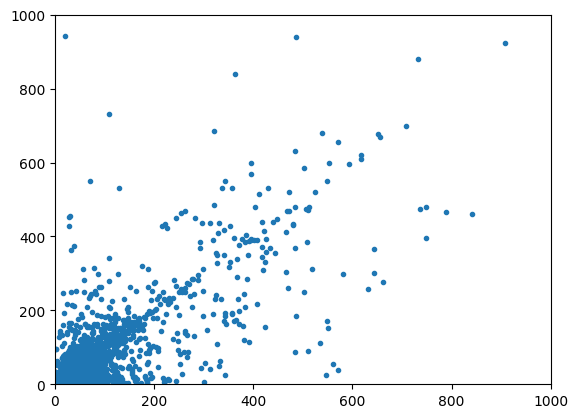

In [178]:
y_predict = model.predict(test_set[x_labels].to_numpy(numpy.float32))
y_actual = test_set[y_labels].to_numpy(numpy.float32).ravel()

plt.plot(y_predict, y_actual, ".")
plt.xlim(0, 1000)
plt.ylim(0, 1000)